In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# def formato_ax(axs):
#     for ax in axs:
#         ax.legend()
#         ax.spines[['right', 'top']].set_visible(False)
#         ax.spines['bottom'].set_color('grey')
#         ax.spines['left'].set_color('grey')

In [14]:
azulier='#1A3D6F'
doradoier='#C65C25'

In [4]:
f='../../data/temixco.csv'
tmx=pd.read_csv(f, index_col=0, parse_dates=True)
tmx

,Ib,Ig,To,RH,WS,WD,P
time,,,,,,,
2018-01-01 00:00:00,NaN,NaN,18.70,36.34,1.422,316.0,87864.11
2018-01-01 00:10:00,0.002,0.0,18.95,35.29,1.008,283.7,87876.37
2018-01-01 00:20:00,0.170,0.0,18.94,35.43,1.565,326.0,87888.64
2018-01-01 00:30:00,0.371,0.0,18.77,35.89,2.175,354.5,87887.21
2018-01-01 00:40:00,0.305,0.0,18.81,36.34,1.902,348.0,87886.91
...,...,...,...,...,...,...,...
2018-12-31 23:10:00,0.125,0.0,18.51,47.29,1.715,332.2,87484.32
2018-12-31 23:20:00,0.000,0.0,18.26,48.02,1.703,320.5,87470.70
2018-12-31 23:30:00,0.044,0.0,18.39,46.84,2.887,335.7,87455.03


In [5]:
tmx.resample('D').mean()

,Ib,Ig,To,RH,WS,WD,P
time,,,,,,,
2018-01-01,221.831692,196.896224,21.073333,32.187431,1.876833,232.879993,87909.729097
2018-01-02,249.390757,207.372653,19.813264,35.512986,2.001646,245.576264,87888.903403
2018-01-03,218.034125,201.641069,19.910069,38.419931,1.763222,232.080507,87793.584931
2018-01-04,225.306146,204.159410,19.705417,38.755625,2.016458,256.483194,87825.970833
2018-01-05,218.640007,201.917583,20.782639,39.015347,1.749632,201.385174,87860.551181
...,...,...,...,...,...,...,...
2018-12-27,231.563910,196.115382,20.374861,38.395278,1.862326,228.803736,87352.120069
2018-12-28,171.924813,187.943847,19.778750,38.683472,1.780937,240.314889,87485.302292
2018-12-29,340.988951,221.332215,20.654167,37.877083,1.792576,257.010472,87510.554444


In [6]:
dia=tmx[['Ig', 'To']].groupby(by=[tmx.index.strftime('%H:%M')]).mean()

<AxesSubplot:xlabel='time'>

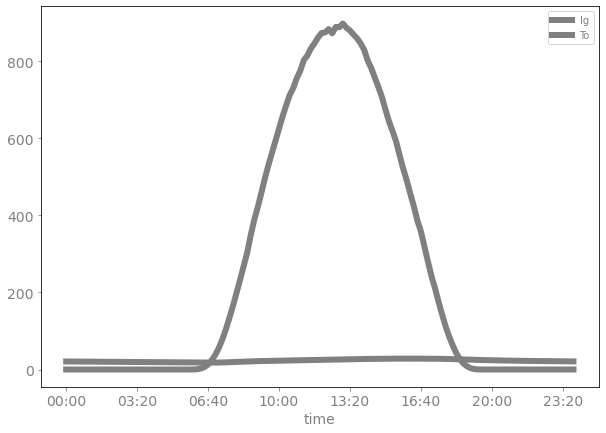

In [22]:
plt.style.use('../enerdata.mplstyle')
dia.plot()

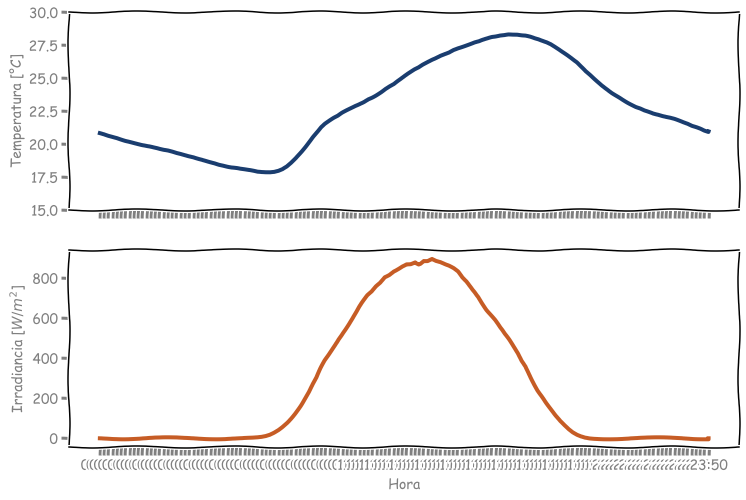

In [23]:
with plt.xkcd():
    fig, ax=plt.subplots(2, figsize=(12, 8), sharex=True)

    # hours=mdates.HourLocator(interval=1)

    ax[0].plot(dia.To, c=azulier, linewidth=4)
    ax[1].plot(dia.Ig, c=doradoier, linewidth=4)

    ax[0].set_ylim(15, 30)

    ax[0].set_ylabel('Temperatura [°C]')
    ax[1].set_ylabel('Irradiancia [$W/m^2$]')
    ax[1].set_xlabel('Hora')
    # ax[1].xaxis.set_major_locator(hours)

    # fig.autofmt_xdate()

In [ ]:
fig, (ax1, ax2)=plt.subplots(2, figsize=(10, 4))

ax1.plot(dia.To, label='To')
ax2.plot(dia.Ig, label='Ig')